In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

# Step 2: Load dataset
df = pd.read_csv("t20i_Matches_Data_final.csv")

# Step 3: Select features and target variable
X = df[['Team1 Name', 'Team2 Name', 'Match Venue (Country)']]
y = df['Toss Winner']

# Step 4: Convert all to string and clean missing values
for col in X.columns:
    X[col] = X[col].astype(str).fillna("Unknown")
y = y.astype(str).fillna("Unknown")

# Step 5: Remove rare classes (those with only one occurrence)
counts = y.value_counts()
valid_labels = counts[counts >= 2].index
mask = y.isin(valid_labels)
X, y = X[mask], y[mask]
print(f"Removed {len(df) - len(X)} rows with rare classes.")

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Preprocess categorical features (One-Hot Encoding)
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown='ignore'), X.columns)]
)

# Step 8: Build Logistic Regression model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=5000, class_weight='balanced', solver='lbfgs'))
])

# Step 9: Train model
model.fit(X_train, y_train)

# Step 10: Predict on test set
y_pred = model.predict(X_test)

# Step 11: Evaluate performance
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n--- Model Performance ---")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1 Score :", round(f1, 4))




C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10684\1818801416.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str).fillna("Unknown")
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10684\1818801416.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str).fillna("Unknown")
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_10684\1818801416.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Removed 5 rows with rare classes.

--- Model Performance ---
Accuracy : 0.5425
Precision: 0.5713
Recall   : 0.5425
F1 Score : 0.5395


<Figure size 1200x1000 with 0 Axes>

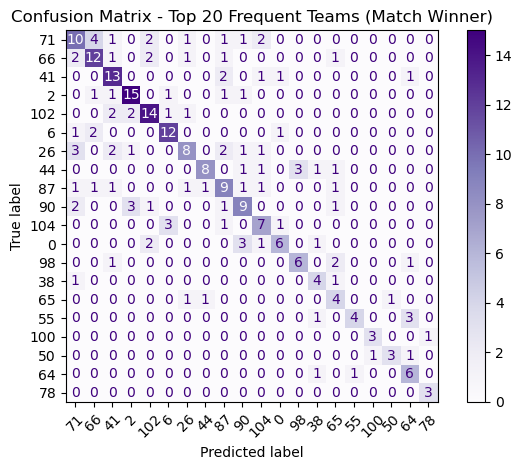

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Find top 20 most common teams in y_test
top = y_test.value_counts().head(20).index
mask = y_test.isin(top)
y_test_top = y_test[mask]
y_pred_top = pd.Series(y_pred, index=y_test.index)[mask]

labels_top = np.array(top)

cm_top = confusion_matrix(y_test_top, y_pred_top, labels=labels_top)
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_top, display_labels=labels_top)
disp.plot(cmap='Purples', xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix - Top 20 Frequent Teams (Match Winner)')
plt.tight_layout()
plt.show()

# After using Grid search Cv

In [4]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

# Step 2: Load dataset
df = pd.read_csv("t20i_Matches_Data_final.csv")

# Step 3: Select features and target variable
X = df[['Team1 Name', 'Team2 Name', 'Match Venue (Country)']].copy()
y = df['Toss Winner'].copy()

# Step 4: Convert and clean missing
for col in X.columns:
    X[col] = X[col].fillna("Unknown").astype(str)
y = y.fillna("Unknown").astype(str)

# Step 5: Remove rare classes (only 1 sample)
valid_labels = y.value_counts()[y.value_counts() >= 2].index
mask = y.isin(valid_labels)
X, y = X[mask], y[mask]
print(f"Removed {len(df) - len(X)} rows with rare classes.")

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 7: Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), X.columns)]
)

# Step 8: Create pipeline with Logistic Regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        solver="lbfgs",          # fixed solver
        penalty="l2",            # fixed penalty
        class_weight="balanced", # handle imbalance
        max_iter=5000
    ))
])

# Step 9: Define ONE hyperparameter to tune
param_grid = {
    "classifier__C": [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

# Step 10: GridSearchCV (only one parameter)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Step 11: Fit Grid Search
grid_search.fit(X_train, y_train)

print("\n=== Grid Search Results (Single Hyperparameter) ===")
print(f"Best C: {grid_search.best_params_['classifier__C']}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# Step 12: Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n--- Final Test Performance ---")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")



Removed 5 rows with rare classes.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



=== Grid Search Results (Single Hyperparameter) ===
Best C: 5.0
Best Cross-Validation Accuracy: 0.5798

--- Final Test Performance ---
Accuracy : 0.5637
Precision: 0.5833
Recall   : 0.5637
F1 Score : 0.5540


<Figure size 1200x1000 with 0 Axes>

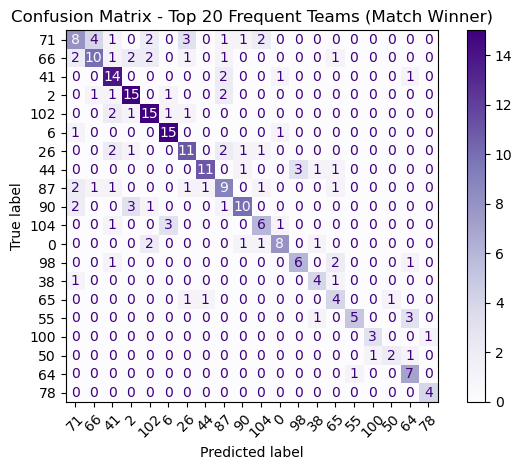

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Find top 20 most common teams in y_test
top = y_test.value_counts().head(20).index
mask = y_test.isin(top)
y_test_top = y_test[mask]
y_pred_top = pd.Series(y_pred, index=y_test.index)[mask]

labels_top = np.array(top)

cm_top = confusion_matrix(y_test_top, y_pred_top, labels=labels_top)
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_top, display_labels=labels_top)
disp.plot(cmap='Purples', xticks_rotation=45, colorbar=True)
plt.title('Confusion Matrix - Top 20 Frequent Teams (Match Winner)')
plt.tight_layout()
plt.show()